In [43]:
# Import des packages généraux et visualisation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#joblib
from joblib import dump,load

# ML
from sklearn import model_selection, preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score,cross_val_predict,cross_validate, train_test_split

#Pretraitements ML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Modèles
from sklearn.linear_model import LogisticRegression,LinearRegression, LassoCV, RidgeCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

#Metriques
from sklearn.metrics import classification_report,mean_squared_error
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

#reechantillonage
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

# Chargement du df avec l'encodage des colonnes

In [44]:
df = load("C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_REGEX_encode.joblib")

# le regex densite n'a pas fonctionné correctement : retrait
df = df.drop(['densite_encod_freq','densite_encod_freq_2cat','densite_encod_freq_quartiles','densite_encod_freq_2cat_variante'],axis=1)

# Reconstitution des df pour le test des variantes

In [45]:
colonnes_freq_encodage = ['prdtypecode','masse_encod_freq', 'surface_encod_freq', 'vitesse_encod_freq','pression_encod_freq',
'energie_alim_encod_freq', 'energie_elec_encod_freq', 'longueur_encod_freq','volume_encod_freq','memoire_encod_freq',
'temps_encod_freq', 'chiffres_encod_freq', 'description_vide_encod_freq', 'Nb_mots_cat_encod_freq']

colonnes_frequency_encodage_2cat = ['prdtypecode','masse_encod_freq_2cat', 'surface_encod_freq_2cat', 'vitesse_encod_freq_2cat', 'pression_encod_freq_2cat',
       'energie_alim_encod_freq_2cat', 'energie_elec_encod_freq_2cat','longueur_encod_freq_2cat', 'volume_encod_freq_2cat',
       'memoire_encod_freq_2cat', 'temps_encod_freq_2cat','chiffres_encod_freq_2cat', 'description_vide_encod_freq',
       'Nb_mots_cat_encod_freq']

colonnes_frequency_encodage_quartiles = ['prdtypecode','masse_encod_freq_2cat', 'surface_encod_freq_quartiles', 'vitesse_encod_freq_quartiles',
       'pression_encod_freq_quartiles', 'energie_alim_encod_freq_quartiles','energie_elec_encod_freq_quartiles', 'longueur_encod_freq_quartiles',
       'volume_encod_freq_quartiles', 'memoire_encod_freq_quartiles','temps_encod_freq_quartiles', 'chiffres_encod_freq_quartiles',
       'description_vide_encod_freq', 'Nb_mots_cat_encod_freq']

colonnes_frequency_encodage_2cat_variante = ['prdtypecode','masse_encod_freq_2cat_variante','surface_encod_freq_2cat_variante',
 'vitesse_encod_freq_2cat_variante', 'pression_encod_freq_2cat_variante', 'energie_alim_encod_freq_2cat_variante', 'energie_elec_encod_freq_2cat_variante',
 'longueur_encod_freq_2cat_variante', 'volume_encod_freq_2cat_variante', 'memoire_encod_freq_2cat_variante', 'temps_encod_freq_2cat_variante',
 'chiffres_encod_freq_2cat_variante', 'description_vide_encod_freq','Nb_mots_cat_encod_freq']


colonnes_helmert_encodage_2cat = ['prdtypecode','masse_encod_Helmert_2cat_0','surface_encod_Helmert_2cat_0', 'vitesse_encod_Helmert_2cat_0',
 'pression_encod_Helmert_2cat_0', 'energie_alim_encod_Helmert_2cat_0', 'masse_encod_Helmert_2cat_0', 'longueur_encod_Helmert_2cat_0',
 'volume_encod_Helmert_2cat_0', 'memoire_encod_Helmert_2cat_0', 'temps_encod_Helmert_2cat_0', 'chiffres_encod_Helmert_2cat_0',
 'description_vide_encod_freq', 'Nb_mots_cat_encod_freq']
                                 
colonnes_helmert_encodage_6cat = ['prdtypecode', 'masse_encod_Helmert_6cat_0', 'masse_encod_Helmert_6cat_1', 'masse_encod_Helmert_6cat_2',
 'masse_encod_Helmert_6cat_3', 'masse_encod_Helmert_6cat_4', 'masse_encod_Helmert_6cat_5', 'surface_encod_Helmert_6cat_0',
 'surface_masse_encod_Helmert_6cat_1', 'surface_encod_Helmert_6cat_2', 'surface_cat_3', 'surface_masse_encod_Helmert_6cat_4',
 'surface_masse_encod_Helmert_6cat_5', 'vitesse_encod_Helmert_6cat_0', 'vitesse_encod_Helmert_6cat_1', 'vitesse_encod_Helmert_6cat_2',
 'pression_encod_Helmert_6cat_0', 'pression_encod_Helmert_6cat_1', 'pression_encod_Helmert_6cat_2', 'pression_encod_Helmert_6cat_3',
 'pression_encod_Helmert_6cat_4', 'pression_encod_Helmert_6cat_5', 'energie_alim_encod_Helmert_6cat_0', 'energie_alim_encod_Helmert_6cat_1',
 'energie_alim_encod_Helmert_6cat_2', 'energie_alim_encod_Helmert_6cat_3', 'energie_alim_encod_Helmert_6cat_4', 'energie_alim_encod_Helmert_6cat_5',
 'energie_encod_Helmert_6cat_0', 'energie_encod_Helmert_6cat_1', 'energie_encod_Helmert_6cat_2', 'energie_encod_Helmert_6cat_3',
 'energie_encod_Helmert_6cat_4', 'energie_encod_Helmert_6cat_5', 'longueur_encod_Helmert_6cat_0', 'longueur_encod_Helmert_6cat_1',
 'longueur_encod_Helmert_6cat_2', 'longueur_encod_Helmert_6cat_3', 'longueur_encod_Helmert_6cat_4', 'longueur_encod_Helmert_6cat_5',
 'volume_encod_Helmert_6cat_0', 'volume_encod_Helmert_6cat_1', 'volume_encod_Helmert_6cat_2', 'volume_encod_Helmert_6cat_3',
 'volume_encod_Helmert_6cat_4', 'volume_encod_Helmert_6cat_5', 'memoire_encod_Helmert_6cat_0', 'memoire_encod_Helmert_6cat_1',
 'memoire_encod_Helmert_6cat_2', 'memoire_encod_Helmert_6cat_3', 'memoire_encod_Helmert_6cat_4', 'memoire_encod_Helmert_6cat_5',
 'temps_encod_Helmert_6cat_0', 'temps_encod_Helmert_6cat_1', 'temps_encod_Helmert_6cat_2', 'temps_encod_Helmert_6cat_3',
 'temps_encod_Helmert_6cat_4', 'temps_encod_Helmert_6cat_5', 'chiffres_encod_Helmert_6cat_0', 'chiffres_encod_Helmert_6cat_1',
 'chiffres_encod_Helmert_6cat_2', 'chiffres_encod_Helmert_6cat_3', 'chiffres_encod_Helmert_6cat_4','chiffres_encod_Helmert_6cat_5',
 'description_vide_encod_freq', 'Nb_mots_cat_encod_freq']


#Reconstitution des df pour les varinates d'encodage
df_freq_encod_brut = df[colonnes_freq_encodage]
df_freq_2cat = df[colonnes_frequency_encodage_2cat]
df_freq_quartiles = df[colonnes_frequency_encodage_quartiles]
df_freq_2cat_variante = df[colonnes_frequency_encodage_2cat_variante]
df_helmert_encodage_2cat = df[colonnes_helmert_encodage_2cat]
df_helmert_encodage_6cat = df[colonnes_helmert_encodage_6cat]


# Chargement des modèles de ML

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15 , random_state=123)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=23,class_weight="balanced",max_iter=1000)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn import svm
svc = svm.SVC(random_state=23,decision_function_shape="ovo")  #probleme avec ce clf

from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_jobs = -1,random_state = 23,class_weight="balanced")

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 23)


# Fonctions

### Création des df avec le score des variantes

In [47]:
import os
import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# fonction pour récupérer le nom d'un df
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

#fonction tester différents modèles et remplir une grille de résultats
def test_model_avec_echantillonnage(liste_modele,df,echantillonnage):
    name = get_df_name(df)
    df_import = pd.DataFrame(columns=["Model", "Accuracy", "F1_weighted", "F1_macro", "Duree en sec","Echantillonage","Dataframe"])
    print(f"création d'un dataframe_score_{name}_{echantillonnage}")
    score = []
    X, y = df.drop('prdtypecode',axis=1), df['prdtypecode']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    for model in liste_modele:
        debut = time.time()
        
        if echantillonnage == 'SMOTE':
            smo = SMOTE()
            X_sm, y_sm = smo.fit_resample(X_train, y_train)
            model.fit(np.asarray(X_sm),y_sm)
        
        if echantillonnage == 'RUS':
            rus = RandomUnderSampler()
            X_rus, y_rus = rus.fit_resample(X_train, y_train)
            model.fit(np.asarray(X_rus),y_rus)
        
        if echantillonnage == 'ROS':
            ros = RandomOverSampler()
            X_ros, y_ros = ros.fit_resample(X_train, y_train)
            model.fit(np.asarray(X_ros),y_ros)
        
        if echantillonnage == 'CENTROID':
            cc = ClusterCentroids()
            X_cc, y_cc = cc.fit_resample(X_train, y_train)
            model.fit(np.asarray(X_cc),y_cc)
            
        if echantillonnage == 'NORMAL':
            model.fit(np.asarray(X_train),y_train)        
        
        y_pred = model.predict(np.asarray(X_test))
        accuracy = accuracy_score(y_test, y_pred)
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        fin = time.time()
        duree = fin - debut
        model_scores = {
            "Model": f"{model}",
            "Accuracy": accuracy,
            "F1_weighted": f1_weighted,
            "F1_macro": f1_macro,
            "Duree en sec": duree,
            "Echantillonage": echantillonnage,
            "Dataframe" : name
        }
        score.append(model_scores)
    df_score = pd.DataFrame(score)
    df = pd.concat([df_import, df_score], ignore_index=True)
    return df

#fonction pour tester les meilleurs modèles simples en optimisant les paramètres et remplir une grille de résultats
def test_model_pipelines_GridCV(model,df,echantillonnage):
    
    df_import = pd.DataFrame(columns=["Model", "Echantillonage", "Dataframe", "Accuracy", "F1_weighted", "F1_macro", "Duree en sec","best_params","best_score"])
    print("création d'un nouveau dataframe pour les meilleurs modèles")
    
    name = get_df_name(df)
    
    score = []
    X, y = df.drop('prdtypecode',axis=1), df['prdtypecode']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    debut = time.time() 
    model.fit(np.asarray(X_train),y_train)
    y_pred = model.predict(np.asarray(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    best_params = model.best_params_
    best_score = model.best_score_
    fin = time.time()
    duree = fin - debut
    model_scores = {
            "Model": f"{model}",
            "Accuracy": accuracy,
            "F1_weighted": f1_weighted,
            "F1_macro": f1_macro,
            "best_params": best_params,
            "best_score": best_score,
            "Duree en sec": duree,
            "Echantillonage": echantillonnage,
            "Dataframe" : name
        }
    score.append(model_scores)
    df_score = pd.DataFrame(score)
    df = pd.concat([df_import, df_score], ignore_index=True)
    print(classification_report_imbalanced(y_test, y_pred))
    return df

### Fonction de recherche des meilleurs hyperparamètres des meilleurs modèles simples et création du df score

In [48]:
#fonction pour tester les meilleurs modèles simples en optimisant les paramètres et remplir une grille de résultats
def test_model_pipelines_GridCV(model,df,echantillonnage):
    
    df_import = pd.DataFrame(columns=["Model", "Echantillonage", "Dataframe", "Accuracy", "F1_weighted", "F1_macro", "Duree en sec","best_params","best_score"])
    print("création d'un nouveau dataframe pour les meilleurs modèles")
    
    name = get_df_name(df)
    
    score = []
    X, y = df.drop('prdtypecode',axis=1), df['prdtypecode']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    debut = time.time() 
    model.fit(np.asarray(X_train),y_train)
    y_pred = model.predict(np.asarray(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    best_params = model.best_params_
    best_score = model.best_score_
    fin = time.time()
    duree = fin - debut
    model_scores = {
            "Model": f"{model}",
            "Accuracy": accuracy,
            "F1_weighted": f1_weighted,
            "F1_macro": f1_macro,
            "best_params": best_params,
            "best_score": best_score,
            "Duree en sec": duree,
            "Echantillonage": echantillonnage,
            "Dataframe" : name
        }
    score.append(model_scores)
    df_score = pd.DataFrame(score)
    df = pd.concat([df_import, df_score], ignore_index=True)
    print(classification_report_imbalanced(y_test, y_pred))
    return df

# Construction des Dataframes de scores par variantes

In [49]:
liste_modele = [lr,knn,dt,svc,rdf,gbc,dt]

#Creaation des df score
df_score_freq_2cat_variante = test_model_avec_echantillonnage(liste_modele,df_freq_2cat_variante,'NORMAL')
df_score_freq_quartiles = test_model_avec_echantillonnage(liste_modele, df_freq_quartiles,'NORMAL')
df_score_freq_2cat = test_model_avec_echantillonnage(liste_modele, df_freq_2cat,'NORMAL')
df_score_freq_encod_brut = test_model_avec_echantillonnage(liste_modele,df_freq_encod_brut,'NORMAL')
df_score_helmert_encodage_2cat = test_model_avec_echantillonnage(liste_modele, df_helmert_encodage_2cat,'NORMAL')
df_score_helmert_encodage_6cat = test_model_avec_echantillonnage(liste_modele,df_helmert_encodage_6cat,'NORMAL')

#Enregistremennt des df score
for df_name in ["freq_encod_brut","freq_2cat","freq_quartiles","freq_2cat_variante","helmert_encodage_2cat","helmert_encodage_6cat"]:
    dump(f'df_score_{df_name}',f'df_score_{df_name}.joblib') 
    
# Chargement des Dataframes
df_score_freq_2cat = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_freq_2cat.joblib')
df_score_freq_2cat_variante = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_freq_2cat_variante.joblib')
df_score_freq_encod_brut = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_freq_encod_brut.joblib')
df_score_freq_quartiles = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_freq_quartiles.joblib')
df_score_helmert_encodage_2cat = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_helmert_encodage_2cat.joblib')
df_score_helmert_encodage_6cat = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_helmert_encodage_6cat.joblib')

# ## Impact de l'échantillonnage (SMOTE,ROS,RUS,CENTROID) sur les 3 meilleurs modèles selectionnés
# et la meilleure variante d'encodage

liste_meilleurs_modeles_simples = [dt,rdf,gbc]
for echantillonnage in ['SMOTE','ROS','RUS','CENTROID']:
    df_score = test_model_avec_echantillonnage(liste_meilleurs_modeles_simples,df_freq_encod_brut,echantillonnage)
    dump(df_score,f'df_score_freq_encod_brut_{echantillonnage}.joblib')
    
df_score_freq_encod_brut_SMOTE = load('df_score_freq_encod_brut_SMOTE.joblib')
df_score_freq_encod_brut_RUS = load('df_score_freq_encod_brut_RUS.joblib')
df_score_freq_encod_brut_ROS = load('df_score_freq_encod_brut_ROS.joblib')
df_score_freq_encod_brut_CENTROID = load('df_score_freq_encod_brut_CENTROID.joblib')

#compilation des df
df_score_compile = pd.concat([df_score_freq_encod_brut_SMOTE,df_score_freq_encod_brut_RUS,df_score_freq_encod_brut_ROS,df_score_freq_encod_brut_CENTROID,df_score_freq_2cat_variante,df_score_freq_quartiles,df_score_freq_2cat,df_score_df_freq_encod_brut],axis=0)
    
df_score_compile.sort_values(by ='F1_weighted', axis=0,
                              ascending=False,
                              inplace=False,kind='quicksort',
                              na_position='last',ignore_index=False)

dump(df_score_compile,'df_score_compile.joblib')

création d'un dataframe_score_df_freq_2cat_variante_NORMAL


KeyboardInterrupt: 

In [50]:
#Chargement du df
df_score_compile = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\df_score_compile.joblib')
df_score_compile.head(10)

,Model,Accuracy,F1_weighted,F1_macro,Duree en sec,Echantillonage,Dataframe
0,DecisionTreeClassifier(random_state=23),0.329485,0.334387,0.292579,3.805380,SMOTE,df_freq_encod_brut
1,RandomForestClassifier(class_weight='balanced'...,0.343117,0.345530,0.304955,10.339504,SMOTE,df_freq_encod_brut
2,GradientBoostingClassifier(random_state=23),0.308916,0.301573,0.271602,679.428619,SMOTE,df_freq_encod_brut
3,DecisionTreeClassifier(random_state=23),0.266180,0.271509,0.252797,0.065824,RUS,df_freq_encod_brut
4,RandomForestClassifier(class_weight='balanced'...,0.279074,0.280965,0.258702,0.557509,RUS,df_freq_encod_brut
5,GradientBoostingClassifier(random_state=23),0.288837,0.281718,0.259964,27.848157,RUS,df_freq_encod_brut
6,DecisionTreeClassifier(random_state=23),0.318126,0.324572,0.280913,0.367018,ROS,df_freq_encod_brut
7,RandomForestClassifier(class_weight='balanced'...,0.331819,0.337797,0.292025,3.967933,ROS,df_freq_encod_brut
8,GradientBoostingClassifier(random_state=23),0.298232,0.290278,0.264554,397.433201,ROS,df_freq_encod_brut
9,DecisionTreeClassifier(random_state=23),0.132568,0.130284,0.141627,89.489559,CENTROID,df_freq_encod_brut


In [3]:
df_score_compile['Model'] = df_score_compile['Model'].map(lambda x:x.split('(')[0])
df_score_compile.head()

,Model,Accuracy,F1_weighted,F1_macro,Duree en sec,Echantillonage,Dataframe
0,DecisionTreeClassifier,0.329485,0.334387,0.292579,3.805380,SMOTE,df_freq_encod_brut
1,RandomForestClassifier,0.343117,0.345530,0.304955,10.339504,SMOTE,df_freq_encod_brut
2,GradientBoostingClassifier,0.308916,0.301573,0.271602,679.428619,SMOTE,df_freq_encod_brut
3,DecisionTreeClassifier,0.266180,0.271509,0.252797,0.065824,RUS,df_freq_encod_brut
4,RandomForestClassifier,0.279074,0.280965,0.258702,0.557509,RUS,df_freq_encod_brut


## Dataviz

In [4]:
# Effet du modèle sur le F1_weighted 
# Classment par valeurs du F1_weighted  

df_score_compile.sort_values(by ='F1_weighted', axis=0,
                              ascending=False,
                              inplace=False,kind='quicksort',
                              na_position='last',ignore_index=False).head(10)

,Model,Accuracy,F1_weighted,F1_macro,Duree en sec,Echantillonage,Dataframe
37,RandomForestClassifier,0.339064,0.346972,0.297318,1.478047,NORMAL,df_freq_encod_brut
1,RandomForestClassifier,0.343117,0.345530,0.304955,10.339504,SMOTE,df_freq_encod_brut
35,DecisionTreeClassifier,0.347845,0.340024,0.303476,0.134640,NORMAL,df_freq_encod_brut
7,RandomForestClassifier,0.331819,0.337797,0.292025,3.967933,ROS,df_freq_encod_brut
0,DecisionTreeClassifier,0.329485,0.334387,0.292579,3.805380,SMOTE,df_freq_encod_brut
39,DecisionTreeClassifier,0.339617,0.327441,0.291231,0.119680,NORMAL,df_freq_encod_brut
6,DecisionTreeClassifier,0.318126,0.324572,0.280913,0.367018,ROS,df_freq_encod_brut
4,RandomForestClassifier,0.305416,0.309608,0.271434,2.010712,NORMAL,df_helmert_encodage_6cat
2,DecisionTreeClassifier,0.326661,0.305787,0.271752,0.239866,NORMAL,df_helmert_encodage_6cat
6,DecisionTreeClassifier,0.326661,0.305787,0.271752,0.236873,NORMAL,df_helmert_encodage_6cat


In [5]:
# Effet du modèle sur le score F1_weighted, échantillonageg normal et encodage direct par la fréquence
scores_encodage_direct_freq = df_score_compile[(df_score_compile['Echantillonage'] == 'NORMAL') & (df_score_compile['Dataframe'] == 'df_freq_encod_brut')]

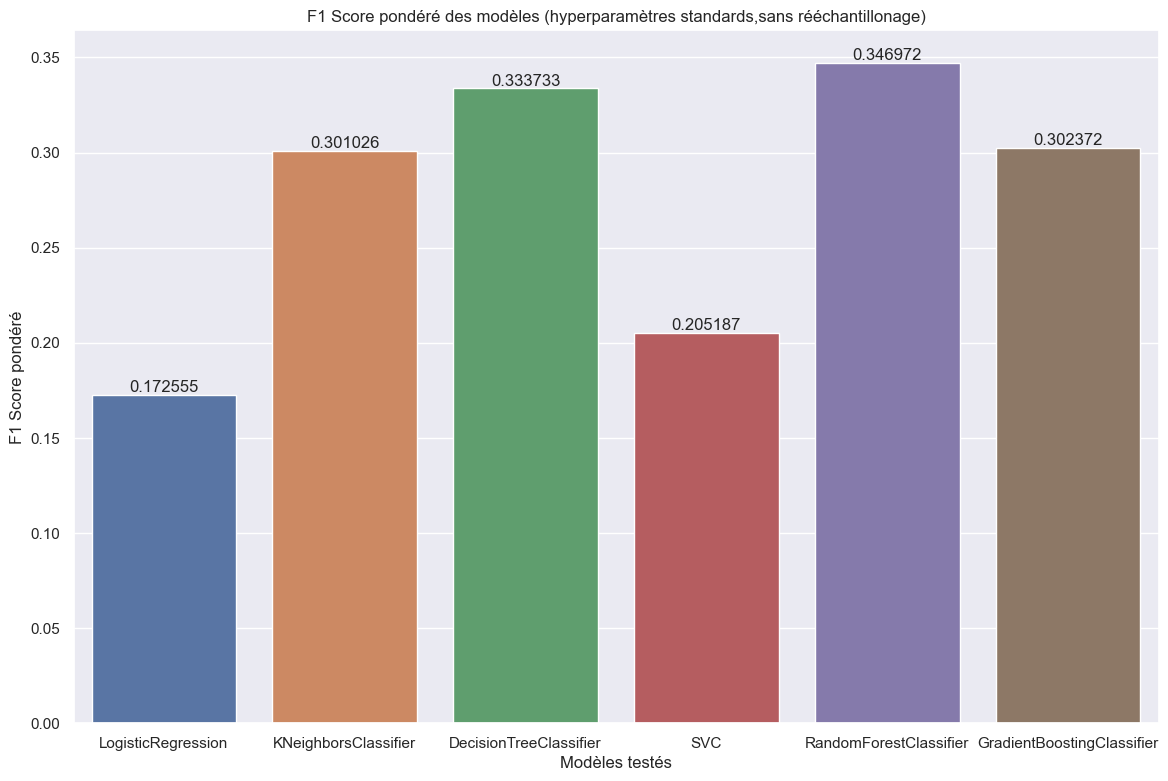

In [8]:
import seaborn as sns

fig = plt.figure(figsize=(14,9))
sns.set_theme()
ax  = sns.barplot(x='Model', y='F1_weighted', data=scores_encodage_direct_freq,errwidth=0);
plt.title('F1 Score pondéré des modèles (hyperparamètres standards,sans rééchantillonage)')
plt.xlabel('Modèles testés')
plt.ylabel('F1 Score pondéré')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

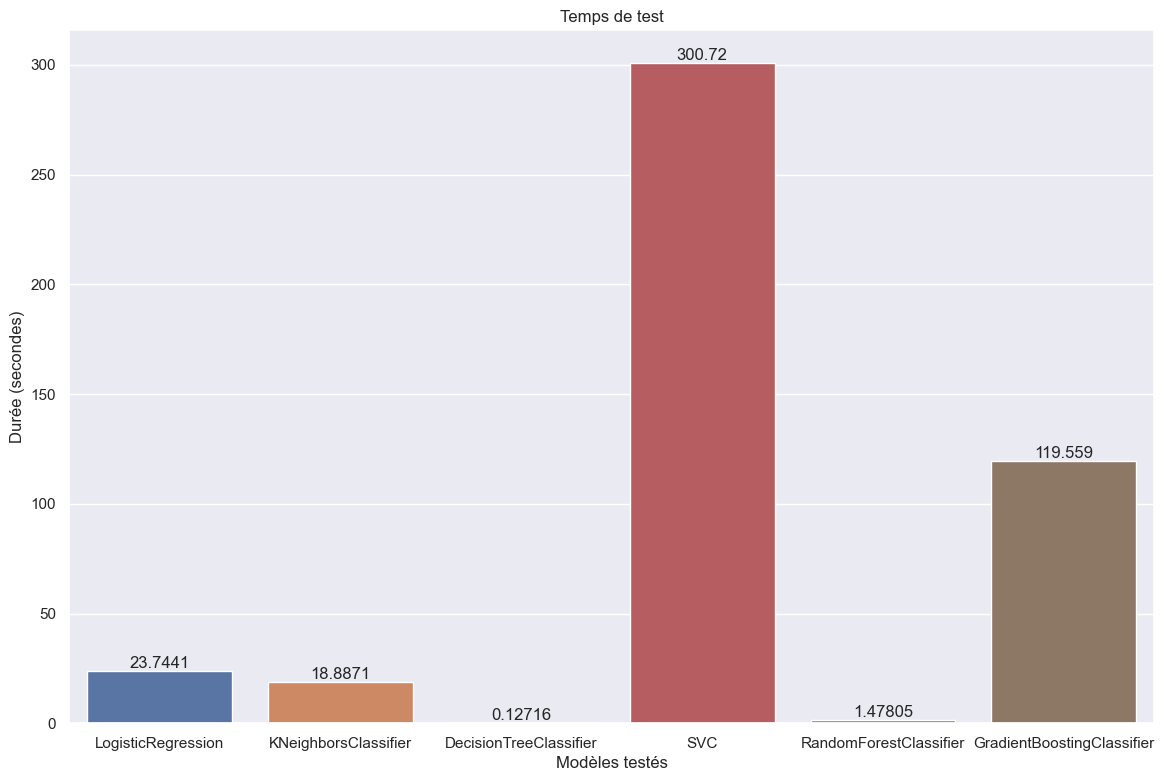

In [10]:
# Effet du modèle sur le score F1_weighted, échantillonageg normal et encodage direct par la fréquence
scores_encodage_direct_freq = df_score_compile[(df_score_compile['Echantillonage'] == 'NORMAL') & (df_score_compile['Dataframe'] == 'df_freq_encod_brut')]

fig = plt.figure(figsize=(14,9))
sns.set_theme()
ax  = sns.barplot(x='Model', y='Duree en sec', data=scores_encodage_direct_freq,errwidth=0);
plt.title('Temps de test')
plt.xlabel('Modèles testés')
plt.ylabel('Durée (secondes)')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [131]:
scores_encodage_direct_freq

,Model,Accuracy,F1_weighted,F1_macro,Duree en sec,Echantillonage,Dataframe
33,LogisticRegression,0.207049,0.172555,0.160296,23.744078,NORMAL,df_freq_encod_brut
34,KNeighborsClassifier,0.303389,0.301026,0.261718,18.887074,NORMAL,df_freq_encod_brut
35,DecisionTreeClassifier,0.347845,0.340024,0.303476,0.134640,NORMAL,df_freq_encod_brut
36,SVC,0.249724,0.205187,0.177222,300.720182,NORMAL,df_freq_encod_brut
37,RandomForestClassifier,0.339064,0.346972,0.297318,1.478047,NORMAL,df_freq_encod_brut
38,GradientBoostingClassifier,0.329792,0.302372,0.272827,119.559146,NORMAL,df_freq_encod_brut
39,DecisionTreeClassifier,0.339617,0.327441,0.291231,0.119680,NORMAL,df_freq_encod_brut


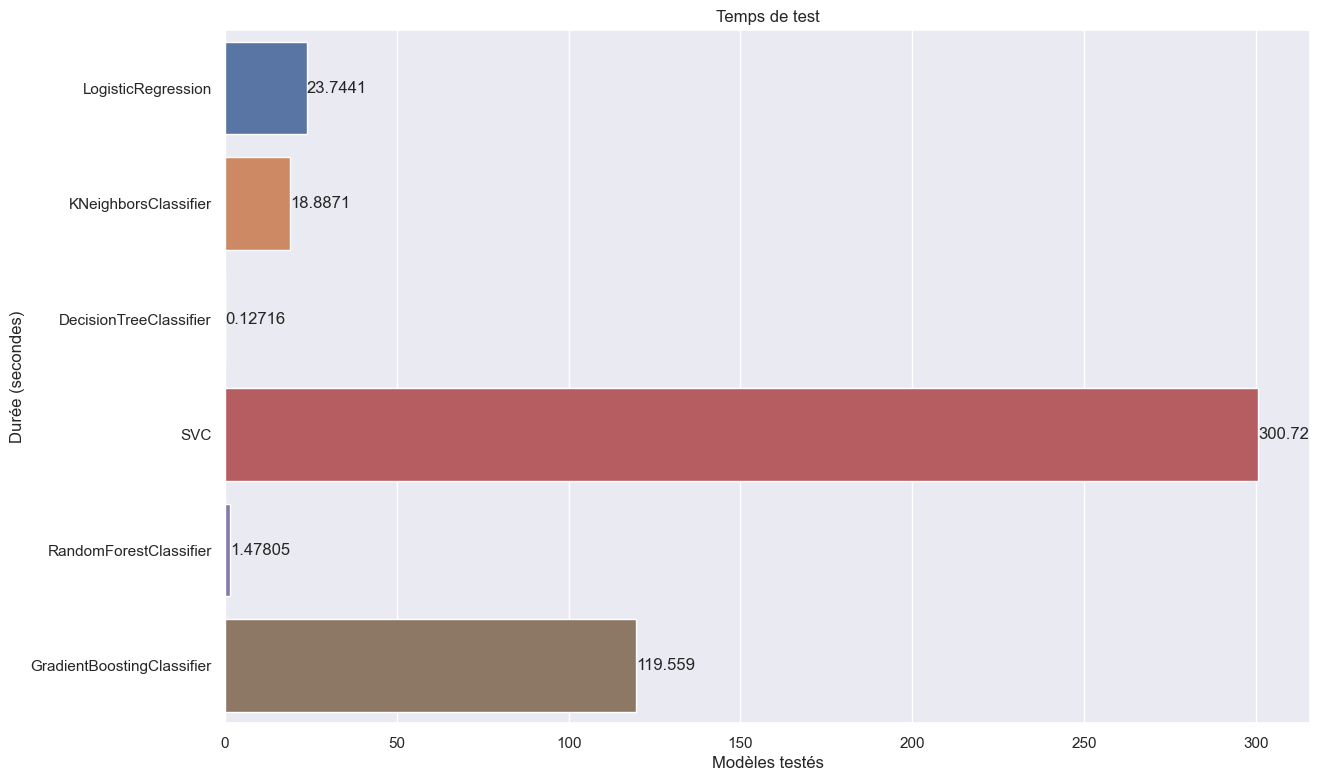

In [11]:
fig = plt.figure(figsize=(14,9))
sns.set_theme()
ax  = sns.barplot(x='Duree en sec', y='Model', data=scores_encodage_direct_freq,errwidth=0);
plt.title('Temps de test')
plt.xlabel('Modèles testés')
plt.ylabel('Durée (secondes)')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Recherche du meilleur encodage

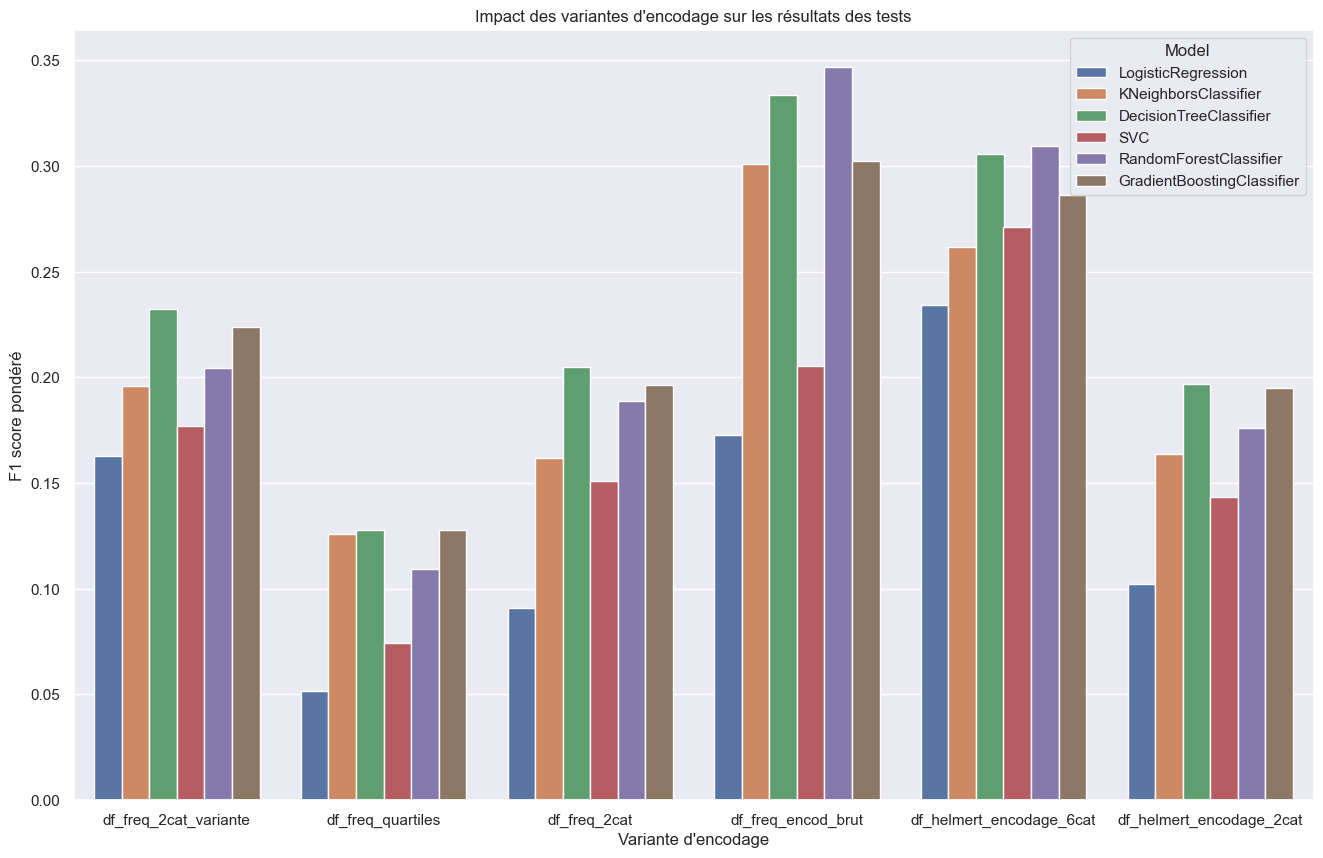

In [12]:

#selection du df correspondant
scores_RF_variation_encodage = df_score_compile[(df_score_compile['Echantillonage'] == 'NORMAL')]
scores_RF_variation_encodage.head()

#graphique
fig = plt.figure(figsize=(16,10))
sns.set_theme()
ax  = sns.barplot(x='Dataframe', y='F1_weighted', hue='Model', data=scores_RF_variation_encodage,errwidth=0);
plt.title("Impact des variantes d'encodage sur les résultats des tests")
plt.xlabel("Variante d'encodage")
plt.ylabel('F1 score pondéré')

plt.show()

In [122]:
df_score_compile['Model'].item

<bound method IndexOpsMixin.item of 0         DecisionTreeClassifier
1         RandomForestClassifier
2     GradientBoostingClassifier
3         DecisionTreeClassifier
4         RandomForestClassifier
5     GradientBoostingClassifier
6         DecisionTreeClassifier
7         RandomForestClassifier
8     GradientBoostingClassifier
9         DecisionTreeClassifier
10        RandomForestClassifier
11    GradientBoostingClassifier
12            LogisticRegression
13          KNeighborsClassifier
14        DecisionTreeClassifier
15                           SVC
16        RandomForestClassifier
17    GradientBoostingClassifier
18        DecisionTreeClassifier
19            LogisticRegression
20          KNeighborsClassifier
21        DecisionTreeClassifier
22                           SVC
23        RandomForestClassifier
24    GradientBoostingClassifier
25        DecisionTreeClassifier
26            LogisticRegression
27          KNeighborsClassifier
28        DecisionTreeClassifier
29     

In [25]:
# effet de l'échantillonage à 
scores_RF_variation_echantillonage = df_score_compile[(df_score_compile['Dataframe'] == 'df_freq_encod_brut') & (df_score_compile['Model'].isin(['DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']))]
scores_RF_variation_echantillonage.head()

,Model,Accuracy,F1_weighted,F1_macro,Duree en sec,Echantillonage,Dataframe
0,DecisionTreeClassifier,0.329485,0.334387,0.292579,3.805380,SMOTE,df_freq_encod_brut
1,RandomForestClassifier,0.343117,0.345530,0.304955,10.339504,SMOTE,df_freq_encod_brut
2,GradientBoostingClassifier,0.308916,0.301573,0.271602,679.428619,SMOTE,df_freq_encod_brut
3,DecisionTreeClassifier,0.266180,0.271509,0.252797,0.065824,RUS,df_freq_encod_brut
4,RandomForestClassifier,0.279074,0.280965,0.258702,0.557509,RUS,df_freq_encod_brut


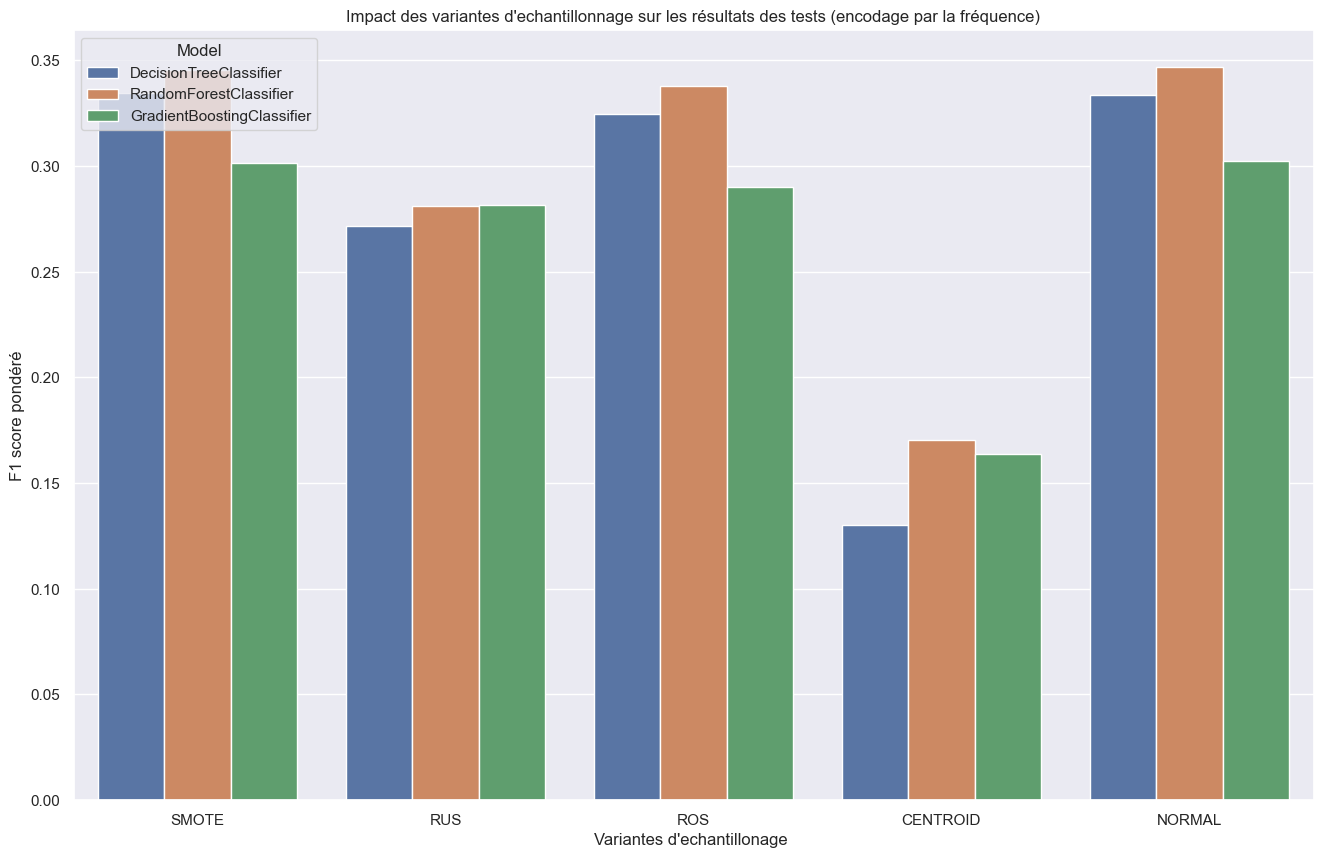

In [26]:
fig = plt.figure(figsize=(16,10))
sns.set_theme()
ax  = sns.barplot(x='Echantillonage', y='F1_weighted', hue='Model', data=scores_RF_variation_echantillonage,errwidth=0);
plt.title("Impact des variantes d'echantillonnage sur les résultats des tests (encodage par la fréquence)")
plt.xlabel("Variantes d'echantillonage ")
plt.ylabel('F1 score pondéré')

#for i in ax.containers:
#    ax.bar_label(i,)
plt.show()

## Optimisation des paramètres sur les trois meilleurs modèles, le meilleur jeu de donnée et le meilleur échantillonnage 

In [51]:
# Pas de rééchantillonage et test des modèles Random Forest, Decision tree Classifier et Gradient Boosting

In [52]:
sc = StandardScaler()  # normalisation des données

#RF
rdf = RandomForestClassifier(n_jobs = -1,random_state = 23,class_weight="balanced")
# Contruction du pipeline
rf_pipe = Pipeline(steps= [('normalisation', sc),    # Etape 1: Normalisation 
                            ('model', rdf)])      # Etape 2: Modèle RF
# Renseignement des paramètres à faire varier
params = {'model__n_estimators': [10,50,100,200,400,500], 'model__max_features': ['auto', 'sqrt', 'log2'], 'model__max_depth': [4, 5, 6, 7, 8], 'model__criterion' : ['gini', 'entropy']}

#GridSearch CV
grid_rf = GridSearchCV(estimator = rf_pipe, param_grid = params, cv = 5)


#DT
dtc = DecisionTreeClassifier(random_state=123,class_weight ='balanced')                           
# Contruction du pipeline
dt_pipe = Pipeline(steps= [('normalisation', sc),    # Etape 1: Normalisation 
                            ('model', dtc)])      # Etape 2: Modèle DT CLF
# Renseignement des paramètres à faire varier
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
params = [{'model__max_depth':depths,
              'model__min_samples_leaf':num_leafs}]

#GridSearch CV
grid_dt = GridSearchCV(estimator = dt_pipe, param_grid = params, cv = 5)


#GBC
gbc = GradientBoostingClassifier(random_state = 23)
rdf = RandomForestClassifier(n_jobs = -1,random_state = 23,class_weight="balanced")
# Contruction du pipeline
gbc_pipe = Pipeline(steps= [('normalisation', sc),    # Etape 1: Normalisation 
                            ('model', gbc)])      # Etape 2: Modèle GBC

# Renseignement des paramètres à faire varier
params = {'model__random_state':[5], 'model__learning_rate':[0.05, 0.1, 0.15], "model__min_samples_split":[2,10,20]}

#GridSearch CV
grid_gbc = GridSearchCV(estimator = gbc_pipe, param_grid = params, cv = 5)


In [53]:
liste_modele_GridCV = [grid_rf,grid_dt,grid_gbc]
grid_rf_score_NORMAL = test_model_pipelines_GridCV(grid_rf,df_freq_encod_brut,'NORMAL')
grid_dt_score_NORMAL = test_model_pipelines_GridCV(grid_dt,df_freq_encod_brut,'NORMAL')
grid_gbc_score_NORMAL = test_model_pipelines_GridCV(grid_gbc,df_freq_encod_brut,'NORMAL')

création d'un nouveau dataframe pour les meilleurs modèles


KeyboardInterrupt: 

In [41]:
grid_score_NORMAL_compile = pd.concat([grid_gbc_score_NORMAL,grid_dt_score_NORMAL,grid_rf_score_NORMAL],axis=0)

NameError: name 'grid_gbc_score_NORMAL' is not defined

In [42]:
dump(grid_score_NORMAL_compile, 'C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\grid_score_NORMAL_compile.joblib')

['C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\grid_score_NORMAL_compile.joblib']

In [54]:
grid_score_NORMAL_compile = load('C:\\Users\\Frederic\\Documents\\GitHub\\AVR23_CDS_Rakuten\\data\\grid_score_NORMAL_compile.joblib')

In [55]:
grid_score_NORMAL_compile.head()

,Model,Echantillonage,Dataframe,Accuracy,F1_weighted,F1_macro,Duree en sec,best_params,best_score
0,"GridSearchCV(cv=5,\n estimator=Pip...",NORMAL,df_freq_encod_brut,0.336731,0.310158,0.283417,4740.405575,"{'model__learning_rate': 0.15, 'model__min_sam...",0.337565
0,"GridSearchCV(cv=5,\n estimator=Pip...",NORMAL,df_freq_encod_brut,0.314442,0.323678,0.282420,44.636362,"{'model__max_depth': 20, 'model__min_samples_l...",0.310961
0,"GridSearchCV(cv=5,\n estimator=Pip...",NORMAL,df_freq_encod_brut,0.282021,0.253291,0.230404,730.406953,"{'model__criterion': 'gini', 'model__max_depth...",0.275468


# Visualisation des attributs les plus importants

In [56]:
#DT
dtc = DecisionTreeClassifier(random_state=123,class_weight ='balanced')                           
# Contruction du pipeline
dt_pipe = Pipeline(steps= [('normalisation', sc),    # Etape 1: Normalisation 
                            ('model', dtc)])      # Etape 2: Modèle DT CLF
# Renseignement des paramètres à faire varier
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
params = [{'model__max_depth':depths,
              'model__min_samples_leaf':num_leafs}]

#GridSearch CV
grid_dt = GridSearchCV(estimator = dt_pipe, param_grid = params, cv = 5)

X, y = df.drop('prdtypecode',axis=1), df['prdtypecode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
grid_dt.fit(np.asarray(X_train),y_train)

grid_dt.best_params_

{'model__max_depth': 20, 'model__min_samples_leaf': 1}

In [57]:
#Instanciation avec les meilleurs paramètres
dtc = DecisionTreeClassifier(random_state=123,class_weight ='balanced',max_depth = 20, min_samples_leaf = 1)
dtc.fit(np.asarray(X_train),y_train)

#Création d'un df importance
feats = {}
for feature, importance in zip(df_freq_encod_brut.columns, dtc.feature_importances_):
    feats [feature] = importance

Importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
Importances.sort_values(by='Importance',ascending=False).head(8)

,Importance
temps_encod_freq,0.141692
volume_encod_freq,0.091001
description_vide_encod_freq,0.065909
chiffres_encod_freq,0.056595
longueur_encod_freq,0.050030
prdtypecode,0.046809
energie_elec_encod_freq,0.036784
memoire_encod_freq,0.035245
